In [446]:
import pandas as pd
import numpy as np
import math
import time
import sys
import matplotlib.pyplot as plt

### Network Connections in a Meta-Network

#### How many network connections are there within a meta-network of size $N$

Suppose a meta-network consists of $N$ nodes, and is split into sub-networks of sizes $n_1, n_2, n_3, \dots, n_k$ such that:

$$
\sum_{i=1}^{k} n_i = N
$$

We are interested in computing the total number of network connections either:
- Meta Network of size N
  * In other words: How many On/Off relationships are there between them?
- 


$$
\textbf{Meta Network Combinations =} \left(2^{N^2} - 2^{N^2 - i} \right)
$$

$$
\textbf{Sub Network Combinations =} \left(\binom{N}{n_1} \left(2^{n_1^2} - 2^{n_1^2 - n_1} \right)\right)
\times \left(\binom{N}{n_2} \left(2^{n_2^2} - 2^{n_2^2 - n_2} \right)\right)
\times \left(\binom{N}{n_3} \left(2^{n_3^2} - 2^{n_3^2 - n_2} \right)\right)
\times \cdots
\times \left(\binom{N}{n_k} \left(2^{n_k^2} - 2^{n_k^2 - n_k} \right)\right)
$$
$$
\text{In other words; given a nework of size N and k subsets selected to belong to subnets of size }
$$

$$
\textbf{Subnetwork Combinations} \;\leq\; \textbf{Meta-network Combinations}
$$


### The nature of this problem has deep roots in data analysis and physics
* How does one account for all the interactions between particles in a network? And the degrees of relationships between them?
* For example, given 1,000,000 molecules in a tank, how many ways are there to relate each pair, triplet, quadruplet, etc...
* One way to relate two particles would be to measure their excitability, and if their joint excitability (entanglement) is within some small $\delta$ they are related

### Example: 
* Given 50 people in a room, 24 are drinking, 16 are eating and the rest, 10 are snorting
* In each of these 3 subsets people are either talking or not talking to eachother (if 3 people are in a conversation, they are co-related)

$
\begin{bmatrix}
1 & 0 & 1 & 0 \\
1 & 1 & 0 & 1 \\
0 & 1 & 1 & 0 \\
1 & 0 & 1 & 1 \\
\end{bmatrix}
$
$\text{for example in a 4 person sub-net, person 3 makes eye contact with person 2 but person 2 does not necissarily make eye contact with person 3}
$
* $\text{In this state matrix each cell (i-->j) means that person i sends signal to j with strength 1}$


* $
\textbf{Sub Network Combinations =} \left(\binom{50}{24} \left(2^{24^2} - 2^{24^2 - 24} \right)\right)
\times \left(\binom{50}{16} \left(2^{16^2} - 2^{16^2 - 16} \right)\right)
\times \left(\binom{50}{10} \left(2^{10^2} - 2^{10^2 - 10} \right)\right)
\textbf{$\approx$}\ 10^{317} $


* $
\textbf{Meta Network Combinations =} \left(2^{50^2} - 2^{50^2 - 50} \right)
\space
\textbf{$\approx$}\ 10^{752}$

* $ \text{clearly, adding degrees of relations to each matrix amplifies the combinations connections by an absurd magnitude, imagine there were 4 possible values in each cell instead of 2}$

In [466]:
def func1(i):
    ### Total 0/1 network combinations
    Term1 = (2**i**2) 
    ### Subtract out the Combinations in which the diagonals of the matrix are 0 for
    ### for a 3x3 matrix, this would be the 2**6 remaining combinations of the matrix if the diagonals are all 0
    Term2 = (2**(i**2-i))
    return Term1-Term2

### Split a Number into a random set of combinations
def split_number(N, splits):
    while splits >= N:
        return('choose another number')        
    ### generate locations for split 
    split_locations = [0]
    for i in range(splits):
        val_last = split_locations[i]
        # print(val_last)
        x = np.random.uniform()
        if x > val_last:
            split_locations.append(x)
        else:
            while x <= val_last:
                x = np.random.uniform()
                # print(i, x)
                if x > val_last:
                    split_locations.append(x)
                    break
    split_locations[-1] = 1
    return split_locations

    
def compute_differences(list_nums):
    ### compute differences
    differences = [list_nums[i]-list_nums[i-1] for i in range(1, len(list_nums))]
    ### multiply by differences

    return differences


def compute_bucket_quantities(N, differences):
    # Integer_Quantities = [int(np.max([1., np.floor(N*k)])) for k in differences]
    Integer_Quantities = []
    for k in differences:
        val = int(np.max([1., np.floor(N*k)]))
        checksum = sum(Integer_Quantities)
        if checksum < N:
            Integer_Quantities.append(val)
        else:
            Integer_Quantities.append(0)
        # print(checksum)
    return Integer_Quantities



In [457]:
# def split_number(A):
#     def split(A):
#         A1 = int(np.floor(A * np.random.uniform()))
#         A2 = A - A1
#         return A1, A2
#     A1, A2 = split(A)
#     while A1 <= 1 or A2 <=1:
#         A1, A2 = split(A)
#     return A1, A2

def special_sum(N, N_Split):
    if N < 1:
       raise ValueError("N must be at least 1")
    else:
        total_combinations = 1
        for n in N_Split:
            if n == 0:
                pass
            else:
                sub_combinations = math.comb(N, n) * func1(n)
            total_combinations *= sub_combinations
    return total_combinations

In [468]:
%%time
print(math.log10(special_sum(50, [50])))
print()
print(math.log10(special_sum(50, [16, 24, 10])))

752.574989159953

317.3482326047935
CPU times: user 345 μs, sys: 0 ns, total: 345 μs
Wall time: 336 μs


In [463]:
# counter = 0
# for i in range(1000):
#     try:
#         split_number(7, 5)
#     except:
#         counter+=1
#         print(counter)

# N = 7
# Splits = 5
# N_Bootstrap = 100

def Generate_Special_Sum_DF(N, Splits, N_Bootstrap):
    t0=time.time()
    counter = 0
    Special_Sum_Meta = math.log10(special_sum(N, [N]))
    list_Sub = []
    for k in range(N_Bootstrap):
        #### ex. Split the Number 10 into a random sum of 3 <7, 2, 1> (Randomly)
        ### 1) Generate the Random Uniform Distribution Splits, always increasing
        split_props = split_number(N, Splits)
        ### 2) Generate the vector of differences (p1-0), (p2-p1), (p3-p2)
        differences = compute_differences(split_props)
        ### 3) Generate Random Numbers Summing to 10 
        N_Split = compute_bucket_quantities(N, differences)
        ### 4) Append the log10 special sum, special sum being the one in the formula above
        list_Sub.append(math.log10(special_sum(N, N_Split)))
        # counter+=1
        # if counter % 20 == 0:
        #     print('Counter: ', counter)
        #     print('Minutes: ', (time.time()-t0)/t0)
    list_Meta = [Special_Sum_Meta for i in range(len(list_Sub))]
    df = pd.DataFrame({'Sub': list_Sub})
    df['Meta'] = Special_Sum_Meta
    return df


In [461]:
# Generate_Special_Sum_DF(100, 2, 2)

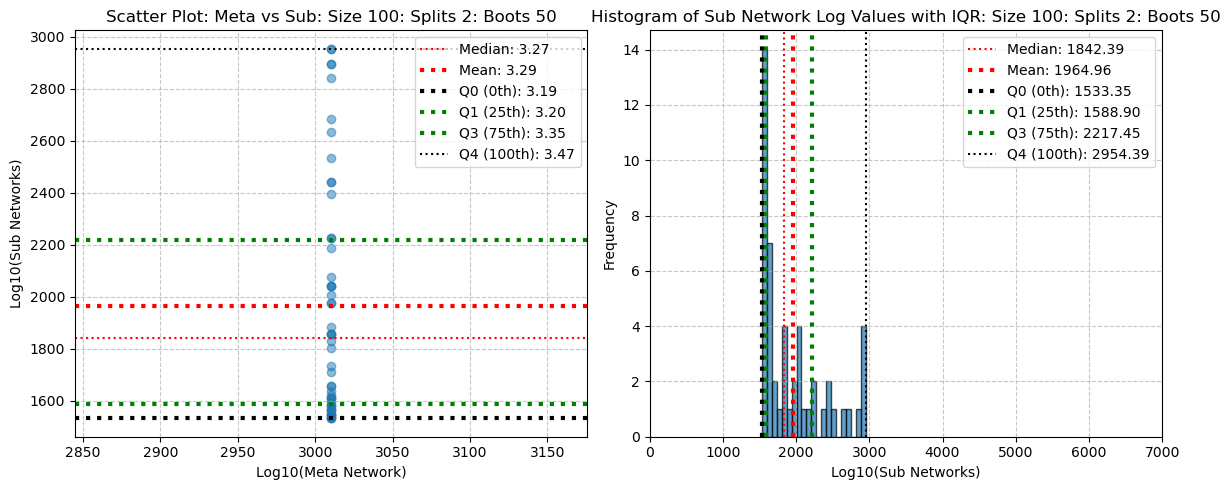

Counter:  1
Minutes:  0.0034548322359720866






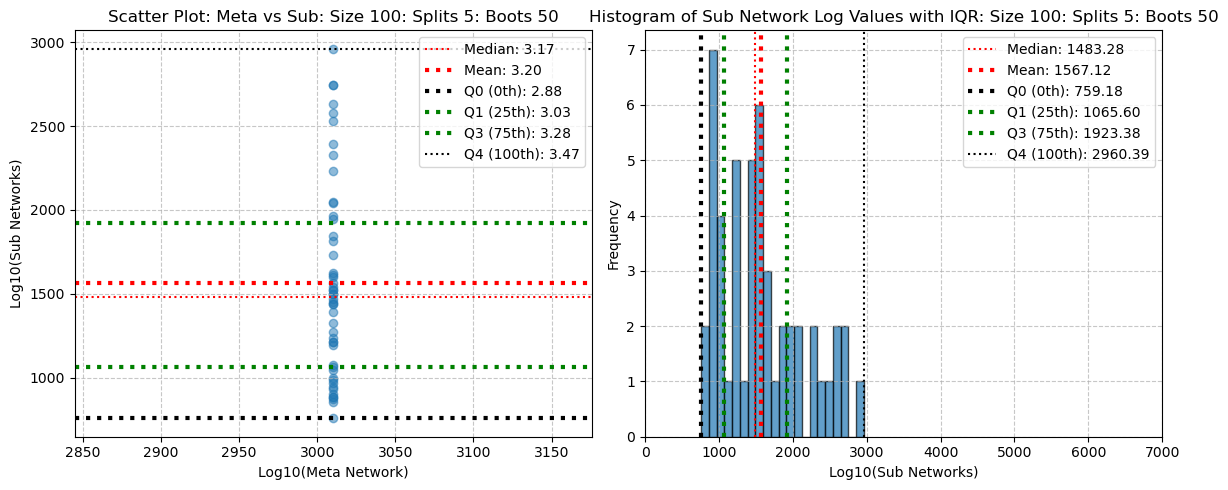

Counter:  2
Minutes:  0.013352616628011068






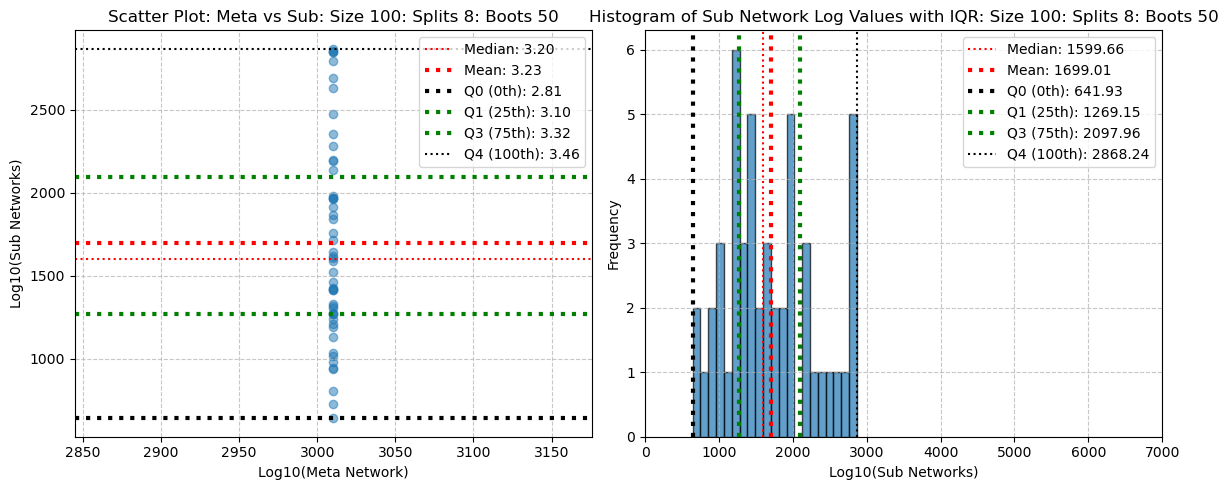

Counter:  3
Minutes:  0.04734584093093872






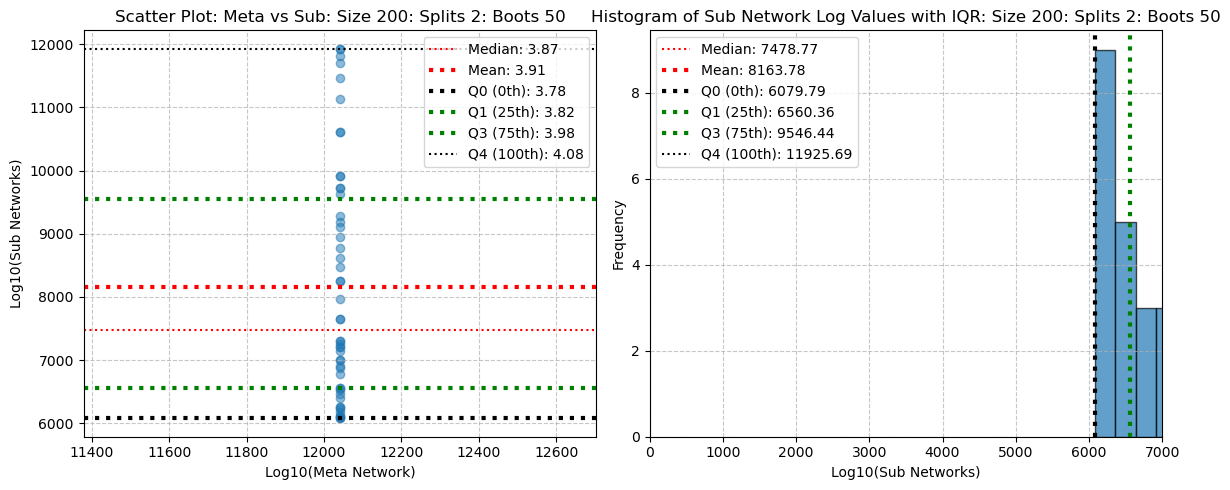

Counter:  4
Minutes:  0.05061471859614054






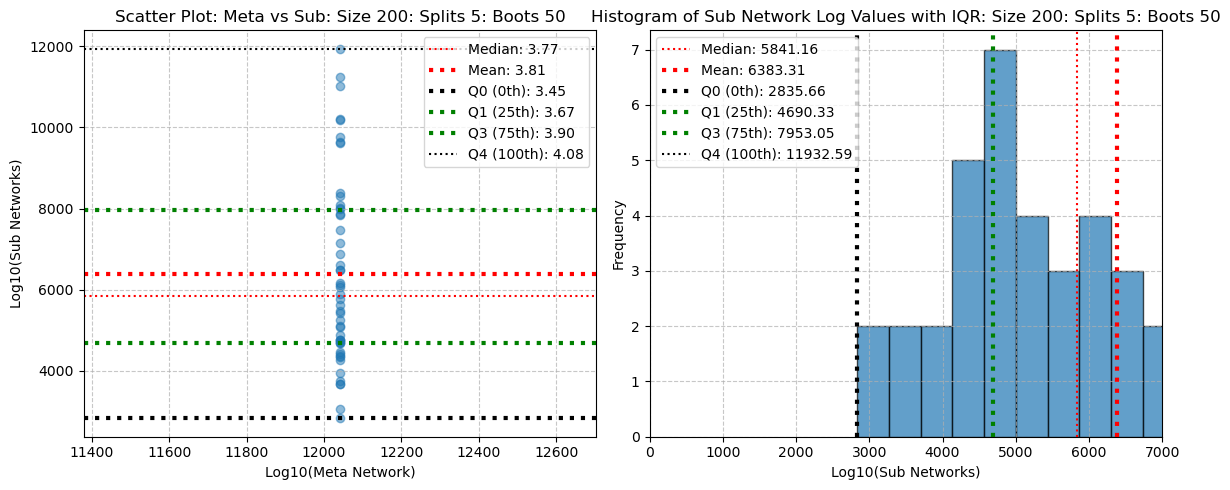

Counter:  5
Minutes:  0.07376118898391723






KeyboardInterrupt: 

In [462]:
%%time
N = [100, 200]#, 500, 1000]
Splits = [2, 5, 8]#, 13]
N_Bootstrap = [50]
counter = 0

t0=time.time()
for n in N:
    for s in Splits:
        for b in N_Bootstrap: 
            print('Session: ', n, ': ', s, ': ', b)
            ### If the number is too large and generates an error, increase the number of splits
            df = Generate_Special_Sum_DF(n, s, b)
            df['Sub'] = df['Sub'].astype(float)
            
            # Calculate median and IQR (Q1 and Q3) of list_Sub
            sub_median = np.median(df['Sub'])
            sub_mean = np.mean(df['Sub'])
            sub_q0 = np.percentile(df['Sub'], 0)
            sub_q1 = np.percentile(df['Sub'], 25)
            sub_q3 = np.percentile(df['Sub'], 75)
            sub_q4 = np.percentile(df['Sub'], 100)
            # Calculate median and IQR (Q1 and Q3) of list_Sub
            # sub_median_log = math.log10(np.median(df['Sub']))
            # sub_mean_log = math.log10(np.mean(df['Sub']))
            # sub_q0_log = math.log10(np.percentile(df['Sub'], 0))
            # sub_q1_log = math.log10(np.percentile(df['Sub'], 25))
            # sub_q3_log = math.log10(np.percentile(df['Sub'], 75))
            # sub_q4_log = math.log10(np.percentile(df['Sub'], 100))
            
            # Create figure with two subplots
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
            
            # 1. Scatter plot of Meta vs Sub
            ax1.scatter(df['Meta'], df['Sub'], alpha=0.5)
            ax1.set_xlabel('Log10(Meta Network)')
            ax1.set_ylabel('Log10(Sub Networks)')
            ax1.set_title('Scatter Plot: Meta vs Sub: Size {}: Splits {}: Boots {}'.format(n, s, b))
            ax1.axhline(sub_median, color='red', linestyle=':', label=f'Median: {math.log10(sub_median):.2f}')
            ax1.axhline(sub_mean, color='red', linestyle=':', label=f'Mean: {math.log10(sub_mean):.2f}', linewidth=3)
            ax1.axhline(sub_q0, color='black', linestyle=':', label=f'Q0 (0th): {math.log10(sub_q0):.2f}', linewidth=3)
            ax1.axhline(sub_q1, color='green', linestyle=':', label=f'Q1 (25th): {math.log10(sub_q1):.2f}', linewidth=3)
            ax1.axhline(sub_q3, color='green', linestyle=':', label=f'Q3 (75th): {math.log10(sub_q3):.2f}', linewidth=3)
            ax1.axhline(sub_q4, color='black', linestyle=':', label=f'Q4 (100th): {math.log10(sub_q4):.2f}')
            ax1.legend()
            
            ax1.grid(True, linestyle='--', alpha=0.7)
            
            # 2. Histogram of list_Sub with median and IQR lines
            ax2.hist(df['Sub'], bins=21, edgecolor='black', alpha=0.7)
            ax2.axvline(sub_median, color='red', linestyle=':', label=f'Median: {sub_median:.2f}')
            ax2.axvline(sub_mean, color='red', linestyle=':', label=f'Mean: {sub_mean:.2f}', linewidth=3)
            ax2.axvline(sub_q0, color='black', linestyle=':', label=f'Q0 (0th): {sub_q0:.2f}', linewidth=3)
            ax2.axvline(sub_q1, color='green', linestyle=':', label=f'Q1 (25th): {sub_q1:.2f}', linewidth=3)
            ax2.axvline(sub_q3, color='green', linestyle=':', label=f'Q3 (75th): {sub_q3:.2f}', linewidth=3)
            ax2.axvline(sub_q4, color='black', linestyle=':', label=f'Q4 (100th): {sub_q4:.2f}')
            ax2.set_xlabel('Log10(Sub Networks)')
            ax2.set_ylabel('Frequency')
            ax2.set_title('Histogram of Sub Network Log Values with IQR: Size {}: Splits {}: Boots {}'.format(n, s, b))
            ax2.grid(True, linestyle='--', alpha=0.7)  # Retain grid lines
            ax2.set_xlim(0, 7000)
            ax2.legend()
            
            # Adjust layout to prevent overlap
            plt.tight_layout()
            plt.show()
            counter +=1
            print('Counter: ', counter)
            print('Minutes: ', (time.time()-t0)/60)
            print('\n\n\n')

$$
\begin{aligned}
 \textbf{How Big is It?}\\
\end{aligned}
$$

$$
\begin{aligned}
\text{Given: } 4\times10^{6} &\approx \text{Transcription Factor Binding Sites per Cell} \\
\\
\text{Given: } 2\times10^{5} &\approx \text{Utilized Transcription Factor Binding Sites per Cell}
\end{aligned}
$$

$$
\textbf{Possible Utilized Transcription Sites per Cell=} \binom{4\times10^{6}}{2\times10^{5}} \approx 1\times10^{344854} 
$$

- At any snapshot in time, there are roughly this many poential transctiption factors being activated in a cell. That is a lot of possible transcription factors. It makes me wonder how on earth a replicating TF cascade can be created in the lab. For example, the sequence of TF states in my liver cells in the presence of alcohol vaires the TF conficurations moment to moment. Lets say Genes 4 5 6 are regulated with frequencies f(4, 1), f(5, 1), f(4, 1) at T1 and f(4, 2), f(5, 2), f(4, 2) at T2.  

In [438]:
### what is 4M C 200K ? 
N = 4000000
C = 200000
D = int(5.e20)
sys.set_int_max_str_digits(D)
len(str(math.comb(N, C)))

OverflowError: Python int too large to convert to C int

In [442]:
P = np.log(2*np.pi*4e6) - np.log(2*np.pi*2e5) - np.log(2*np.pi*3.8e6) + N*np.log(N)- C*np.log(C) - (N-C)*np.log(N-C)
P

np.float64(794046.9807270765)

In [444]:
%time
#!/usr/bin/env python3
import gmpy2

# Set precision for gmpy2 (not strictly necessary for comb, but good practice)
gmpy2.get_context().precision = 1000

# Define n and k
n = 4_000_000
k = 200_000

# Compute the combination C(n, k)
result = gmpy2.comb(n, k)

# Print the exact result
print(f"C({n}, {k}) = {result}")

# Estimate the number of digits
num_digits = int(gmpy2.log10(result)) + 1
print(f"Number of digits in the result: {num_digits}")

# # Optionally, save the result to a file (since it's very large)
# with open("combination_result.txt", "w") as f:
#     f.write(str(result))

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 3.58 μs
C(4000000, 200000) = 1822083429855303525568082317122437779720395675085625825525992424182605246275970921965997347367227978021376589590532195233582847555688728923909090864996780044843971617747203075858790325201742587379502734745014500567095914995413798502966824152904429913521630561716304171793948199046260421718134790113719725168318951296213590451972461365285652988101631586890613649571254930607722398868195281616708325106262989078450117531440953268653098308025037577069733782399048183882441603587082504568358557544186766003194965329232132612803438246755701532340721753620153193586925738010082710509326712816856721556625888977182986797064170521788908416870227217809947000051539144121401041747366924560303961040302626971166794160920730926400144982109526868449241875583751662825499835163368848260365590457995136182323500134332231684627876020161496993767181992379238621736837583835865196832625429892600747613634520488011432210636715

In [448]:
1/3e5

3.3333333333333333e-06

### Scratch

In [6]:
def summation_s_n(n):
    """
    Computes the sum of S(k) from k=1 to N, where S(k) = sum from i=1 to k of (k choose i) * 2^(i^2 - i).
    Args:
        n (int): Upper limit of the outer summation (N >= 1).
    Returns:
        int: The result of the summation.
    Raises:
        ValueError: If n is less than 1.
    """
    if n < 1:
        raise ValueError("N must be at least 1")
    total = 0
    for k in range(1, n + 1):
        # Compute S(k) = sum from i=1 to k of (k choose i) * 2^(i^2 - i)
        s_k = 0
        for i in range(1, k + 1):
            term = math.comb(k, i) * func1(i)#(2**(i*i) - 2**(i*i-i))
            s_k += term
        total += s_k
    return total

summation_s_n(5)

1074207

In [7]:
# A = summation_s_n(5)
# B =  summation_s_n(3) * summation_s_n(2)
# A, B

In [218]:
list_Meta = []
list_Sub = []

A = 100
def split_number(A):
    def split(A):
        A1 = int(np.floor(A * np.random.uniform()))
        A2 = A - A1
        return A1, A2
    A1, A2 = split(A)
    while A1 <= 1 or A2 <=1:
        A1, A2 = split(A)
    return A1, A2

# for i in range(1000):
#     A1, A2 = split_number(A)
#     N_Meta_Network = summation_s_n(A)
#     N_Sub_Networks =  summation_s_n(A1) * summation_s_n(A2)
#     list_Meta.append(math.log10(N_Meta_Network))
#     list_Sub.append(math.log10(N_Sub_Networks))

# Create DataFrame
df = pd.DataFrame({'Meta': list_Meta, 'Sub': list_Sub})

# Create DataFrame
df = pd.DataFrame({'Meta': list_Meta, 'Sub': list_Sub})

# Calculate median and IQR (Q1 and Q3) of list_Sub
sub_median = np.median(list_Sub)
sub_mean = np.mean(list_Sub)
sub_q0 = np.percentile(list_Sub, 0)
sub_q1 = np.percentile(list_Sub, 25)
sub_q3 = np.percentile(list_Sub, 75)
sub_q4 = np.percentile(list_Sub, 100)

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# 1. Scatter plot of Meta vs Sub
ax1.scatter(df['Meta'], df['Sub'], alpha=0.5)
ax1.set_xlabel('Log10(Meta Network)')
ax1.set_ylabel('Log10(Sub Networks)')
ax1.set_title('Scatter Plot: Meta vs Sub: Size {}'.format(A))
ax1.grid(True, linestyle='--', alpha=0.7)

# 2. Histogram of list_Sub with median and IQR lines
ax2.hist(list_Sub, bins=20, edgecolor='black', alpha=0.7)
ax2.axvline(sub_median, color='red', linestyle=':', label=f'Median: {sub_median:.2f}')
ax2.axvline(sub_mean, color='red', linestyle=':', label=f'Mean: {sub_median:.2f}', linewidth=3)
ax2.axvline(sub_q0, color='black', linestyle=':', label=f'Q1 (0th): {sub_q1:.2f}', linewidth=3)
ax2.axvline(sub_q1, color='green', linestyle=':', label=f'Q1 (25th): {sub_q1:.2f}', linewidth=3)
ax2.axvline(sub_q3, color='black', linestyle=':', label=f'Q3 (75th): {sub_q3:.2f}', linewidth=3)
ax2.axvline(sub_q4, color='black', linestyle=':', label=f'Q1 (100th): {sub_q1:.2f}')
ax2.set_xlabel('Log10(Sub Networks)')
ax2.set_ylabel('Frequency')
ax2.set_title('Histogram of Sub Network Log Values with IQR: Size {}'.format(A))
ax2.grid(True, linestyle='--', alpha=0.7)  # Retain grid lines
ax2.legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

/home/alsuar/anaconda3/envs/deep_learning/lib/python3.13/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/alsuar/anaconda3/envs/deep_learning/lib/python3.13/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


IndexError: index -1 is out of bounds for axis 0 with size 0

In [36]:
t0 =  time.time()
list_time = []
for k in range(100, 2200, 100):
    t1 = time.time()
    val = summation_s_n(k)
    log = math.log10(val)
    t2 = time.time()
    time_elapsed = (t2-t0)/60
    print('Segment Time: ', k, ': ', time_elapsed)
    print('Total Time: ', k, ': ', (t2-t0)/60)
    # print(val)
    print('Appx, Num Digits: ', log)
    list_time.append(time_elapsed)
    print('\n')

pd.plot(pd.DataFrame(list_time))

Segment Time:  100 :  0.00048671563466389975
Total Time:  100 :  0.00048671563466389975
Appx, Num Digits:  3010.299956639812


Segment Time:  200 :  0.005491721630096436
Total Time:  200 :  0.005491721630096436
Appx, Num Digits:  12041.199826559248


Segment Time:  300 :  0.03584648768107097
Total Time:  300 :  0.03584648768107097
Appx, Num Digits:  27092.69960975831


Segment Time:  400 :  0.14534886678059897
Total Time:  400 :  0.14534886678059897
Appx, Num Digits:  48164.79930623699


Segment Time:  500 :  0.3877873420715332
Total Time:  500 :  0.3877873420715332
Appx, Num Digits:  75257.4989159953


Segment Time:  600 :  0.9041422724723815
Total Time:  600 :  0.9041422724723815
Appx, Num Digits:  108370.79843903323


Segment Time:  700 :  1.890860637029012
Total Time:  700 :  1.890860637029012
Appx, Num Digits:  147504.69787535077


Segment Time:  800 :  3.6390781958897906
Total Time:  800 :  3.6390781958897906
Appx, Num Digits:  192659.19722494797


Segment Time:  900 :  6.4946107

KeyboardInterrupt: 